In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# show plot first run
%matplotlib inline 
# test autocompletion with tab or tab+shift
%config IPCompleter.greedy=True 

In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


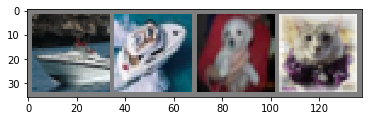

     ship      ship       dog       cat


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()  

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

<img src="mnist.png">

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        #print(x.size()) 4*100 !!
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
#net.to(device)
print(net)
print('Problem between conv2 und full connected maxpool2d is missing.')

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Problem between conv2 und full connected maxpool2d is missing.


In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        # batch of 4!
        inputs, labels = data
        #inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        
        #print('in',inputs.shape)
        #print('out',outputs.shape)
        #print('labels',labels.shape)
        
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)


In [ ]:
# test if we have learned something
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [ ]:
net = Net()
PATH = './cifar_net.pth'
net.load_state_dict(torch.load(PATH))

In [ ]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        #print(outputs.shape)
        _, predicted = torch.max(outputs.data , 1)
        #print(predicted)
        #print(test)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

In [1]:
for i in range(20):
    print('i',i)
    for j in range(20):
        print('j',j)
        for n in range(5):
            print('n',n)
            break

i 0
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j 15
n 0
j 16
n 0
j 17
n 0
j 18
n 0
j 19
n 0
i 1
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j 15
n 0
j 16
n 0
j 17
n 0
j 18
n 0
j 19
n 0
i 2
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j 15
n 0
j 16
n 0
j 17
n 0
j 18
n 0
j 19
n 0
i 3
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j 15
n 0
j 16
n 0
j 17
n 0
j 18
n 0
j 19
n 0
i 4
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j 15
n 0
j 16
n 0
j 17
n 0
j 18
n 0
j 19
n 0
i 5
j 0
n 0
j 1
n 0
j 2
n 0
j 3
n 0
j 4
n 0
j 5
n 0
j 6
n 0
j 7
n 0
j 8
n 0
j 9
n 0
j 10
n 0
j 11
n 0
j 12
n 0
j 13
n 0
j 14
n 0
j